## Part I: Research Question

### A. Purpose of the Data Mining Report:

The purpose of this data mining report is to utilize Principal Component Analysis (PCA) to uncover the principal variables that characterize the patients of a hospital. This analysis aims to provide insights into the major dimensions of patient data which influence hospital admissions and readmissions. By identifying these key variables, the hospital can optimize patient management and tailor interventions more effectively, potentially reducing costs and improving patient outcomes.

**1. Proposed Research Question**

**How can Principal Component Analysis (PCA) be used to identify the key characteristics of patients that explain the most variance within our hospital’s dataset, and how do these characteristics inform our patient management strategies?**

This question aims to explore the underlying structure of the patient data to simplify the dataset to its most informative variables. This reduction not only clarifies which variables are most critical but also supports the development of targeted treatment protocols and operational improvements.

**2. Goal of the Data Analysis**

The goal of this data analysis is to reduce the dimensionality of the patient dataset while retaining the most significant variables that capture the maximum variance, thereby providing a simplified yet powerful depiction of patient characteristics.

Objectives:

- Dimensionality Reduction: To reduce the complexity of the dataset, making it easier to analyze and visualize, by identifying a smaller set of variables (principal components) that capture the essential information.
- Strategic Insight: To use the insights gained from the PCA to enhance patient profiling and segmentation. This can potentially improve personalized treatment plans, optimize resource allocation, and ultimately reduce operational costs.

## Part 2: Method Justification

### B. Reasons for Using PCA

**1. How PCA Analyzes the Selected Data Set**

<u>Principal Component Analysis (PCA)</u> is a statistical technique used to reduce the dimensionality of a dataset while retaining as much variability as possible. PCA achieves this by transforming the original variables into a new set of variables, which are linear combinations of the original variables. These new variables, called principal components, are ordered so the first few retain most of the variation present in all of the original variables.

<u>Application to the Dataset</u>:
Given the complexity of the medical dataset with 50 variables, including demographic, medical condition, and hospitalization details, PCA is particularly useful:

- Dimension Reduction: PCA will reduce the clutter of 50 variables by transforming them into a smaller number of principal components that explain most of the variance in the dataset.
- Visualization: With fewer variables, it becomes feasible to visualize the data in two or three dimensions, which can help in spotting patterns, clusters, and outliers more easily.
- Feature Selection: The principal components can highlight the most informative features, helping to focus on the most significant variables impacting patient readmissions.

<u>Expected Outcomes</u>:

- Principal Components: A set of components that summarize the key variation and patterns in the data. Each component is a combination of the dataset's features.
- Variance Explained: PCA will provide insights into how much of the total variance is captured by each principal component, helping to understand what proportion of the information is contained in the first few components.
- Loadings: The coefficients of the original variables in the principal components, which help in interpreting the components in terms of the original variables.

**2. Summarize One Assumption of PCA**

PCA assumes that the principal components are a linear combination of the original features. This implies that the relationships among variables are linear, and the data structure can adequately be captured by hyperplanes. This assumption is crucial because if the underlying data structure is inherently non-linear, PCA may not effectively capture the relationships and interactions between variables, potentially leading to misleading outcomes.

## Part 3: Data Preparation

### C. Data Preparation for PCA

**1. Identification of Continuous Variables**

For the PCA, we will focus on continuous variables that can provide meaningful insights into patient characteristics and hospital services. Based on the dataset description and our research question, the following continuous variables have been identified:

- `VitD_levels`: Vitamin D levels in ng/mL
- `Doc_visits`: Number of visits by the primary physician during the stay
- `Full_meals_eaten`: Number of full meals consumed
- `Initial_days`: Length of initial hospital stay
- `TotalCharge`: Average daily charge
- `Additional_charges`: Charges for miscellaneous services
- `Age`: Age of the patient
- `Income`: Annual income of the patient

These variables are chosen because they are numeric and vary continuously across patients, making them suitable for PCA, which is sensitive to variable scales.

**2. Standardization of Continuous Variables**

Standardization (or Z-score normalization) is the process by which the features will be rescaled so that they’ll have the properties of a standard normal distribution with μ = 0 and σ = 1, where μ is the mean (average) and σ is the standard deviation from the mean. Standard scores (also called z scores) of the samples are calculated as follows:

$ z = \frac{(X - \mu)}{\sigma} $

This step is critical in PCA because it treats all variables equally, especially since PCA is affected by the scale of the variables.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_path = 'medical_clean.csv'

# Load the dataset
medical_data = pd.read_csv(data_path)
medical_data.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [3]:
# Selecting the identified continuous variables
continuous_vars = ['VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'Initial_days',
                             'TotalCharge', 'Additional_charges', 'Age', 'Income']

# Extracting the continuous variables for analysis
continuous_data = medical_data[continuous_vars]

In [4]:
scaler = StandardScaler()
continuous_data_standardized = pd.DataFrame(scaler.fit_transform(continuous_data),
                                            columns=continuous_vars)

# Adding non-continuous data for a complete view
non_continuous_vars = medical_data.columns.difference(continuous_vars)
data_non_continuous = medical_data[non_continuous_vars]

# Merging back the non-continuous data
cleaned_data = pd.concat([data_non_continuous, continuous_data_standardized], axis=1)

# Display the first few rows of the cleaned and standardized data
cleaned_data.head()

,Allergic_rhinitis,Anxiety,Area,Arthritis,Asthma,BackPain,CaseOrder,Children,City,Complication_risk,...,Zip,vitD_supp,VitD_levels,Doc_visits,Full_meals_eaten,Initial_days,TotalCharge,Additional_charges,Age,Income
0,Yes,Yes,Suburban,Yes,Yes,Yes,1,1,Eva,Medium,...,35621,0,0.583603,0.944647,-0.993387,-0.907310,-0.727185,0.765005,-0.024795,1.615914
1,No,No,Urban,No,No,No,2,3,Marianna,High,...,32446,1,0.483901,-0.967981,0.990609,-0.734595,-0.513228,0.715114,-0.121706,0.221443
2,No,No,Suburban,No,No,No,3,3,Sioux Falls,Medium,...,57110,0,0.046227,-0.967981,-0.001389,-1.128292,-1.319983,0.698635,-0.024795,-0.915870
3,No,No,Suburban,Yes,Yes,No,4,0,New Richland,Medium,...,56072,0,-0.687811,-0.967981,-0.001389,-1.244503,-1.460517,0.009004,1.186592,-0.026263
4,Yes,No,Rural,No,No,No,5,1,West Point,Low,...,23181,2,-0.260366,-0.011667,-0.993387,-1.261991,-1.467285,-1.408991,-1.526914,-1.377325


The dataset has been successfully standardized for the selected continuous variables. Here's a detail of the cleaned and standardized dataset, which includes both the transformed continuous variables and the original non-continuous variables:

- Continuous Variables (Standardized): Age, Income, Vitamin D Levels, Doctor Visits, Full Meals Eaten, Initial Days, Total Charge, Additional Charges.
- Other Variables: Retained as they were, including categorical and other types of data.
- 
The standardized values are now centered around zero with a standard deviation of one, making them suitable for performing PCA.

In [5]:
# Saving the standardized data to a new CSV file
output_path = 'standardized_medical_data.csv'
cleaned_data.to_csv(output_path, index=False)

output_path

'standardized_medical_data.csv'

## Part 4: Analysis

### D. Perform PCA

Let's proceed with the PCA on the standardized data to identify the principal components and analyze the variance they capture.

In [6]:
# Performing PCA
pca = PCA()
principal_components = pca.fit_transform(continuous_data_standardized)

In [7]:
# Explained variance by each component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance: \n", explained_variance)

Explained Variance: 
 [0.24907216 0.21428628 0.12893352 0.12641216 0.12299624 0.12138465
 0.03545049 0.00146449]


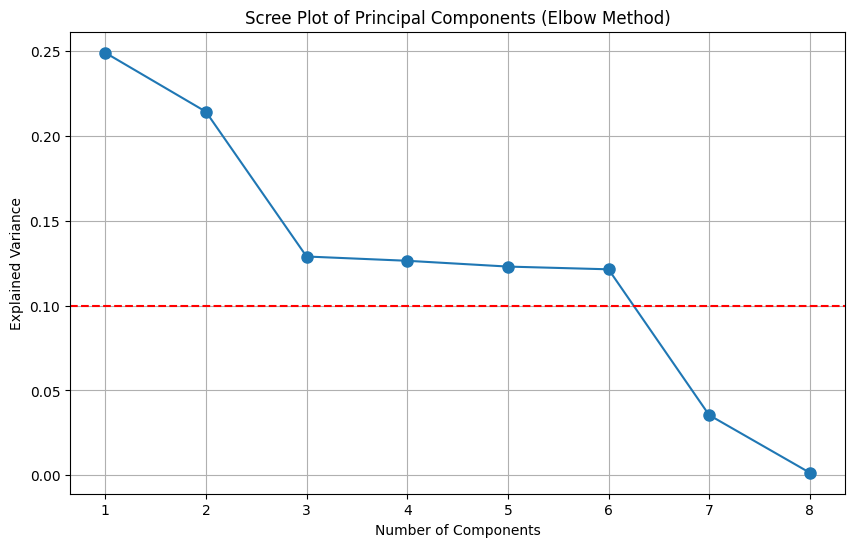

In [9]:
# Elbow method: Plotting a scree plot to visually find the elbow point
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', markersize=8)
plt.title('Scree Plot of Principal Components (Elbow Method)')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.axhline(y=0.1, color='r', linestyle='--')
plt.grid(True)
plt.show()

In [10]:
# Kaiser method: Count the number of components with an eigenvalue greater than 1
eigenvalues = pca.explained_variance_
kaiser_criteria_count = np.sum(eigenvalues > 1)
print("Number of Principal Components by Kaiser Method:", kaiser_criteria_count)

Number of Principal Components by Kaiser Method: 4


In [11]:
# Displaying the factor loadings matrix
factor_loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(explained_variance))],
                               index=continuous_vars)
factor_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
VitD_levels,-0.002245,0.020480,0.612345,0.377572,-0.134448,-0.681150,-0.002211,-0.001499
Doc_visits,-0.007312,0.015914,-0.081779,0.813272,-0.360585,0.448965,0.001258,-0.001112
Full_meals_eaten,-0.019786,0.031480,0.609530,0.081735,0.632414,0.469419,0.010312,-0.001597
Initial_days,0.701179,-0.089590,0.003575,0.012752,0.016412,0.003490,0.031724,-0.706298
TotalCharge,0.702249,-0.078979,0.006832,0.014220,0.016313,0.004662,-0.031284,0.706465
Additional_charges,0.084643,0.701441,-0.025318,-0.007611,0.008620,-0.005497,-0.706160,-0.036755
Age,0.084569,0.701205,-0.030314,-0.010486,-0.002690,-0.014079,0.706565,0.026274
Income,-0.020677,-0.019080,-0.495177,0.434529,0.671817,-0.337413,0.002401,0.001283


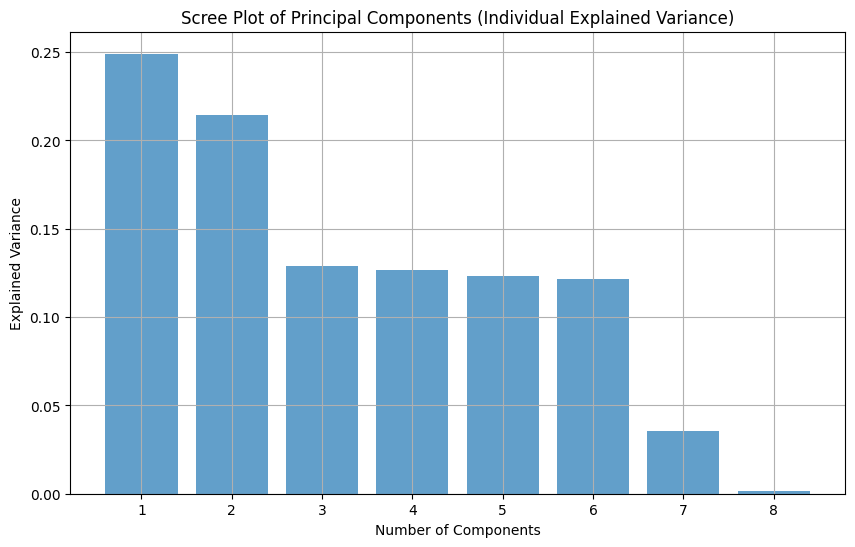

In [12]:
# Creating an individual variance explained scree plot (not cumulative)
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
plt.title('Scree Plot of Principal Components (Individual Explained Variance)')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

**1. Matrix of All Principal Components (Loadings)**

Interpretation of Principal Components:
- PC1 and PC2: These components are heavily influenced by `TotalCharge`, `Initial_days`, `Additional_charges`, and `Age`, suggesting they capture financial and demographic aspects.
- PC3 and PC4: These components are primarily associated with `VitD_levels`, `Full_meals_eaten`, and `Doc_visits`, highlighting dietary and healthcare service factors.

**2. Identification of the Total Number of Principal Components**

*Kaiser Method:*
The Kaiser Method for identifying the total number of principal components is based on the eigenvalues derived from the covariance matrix of the dataset. According to this method, we retain principal components whose eigenvalues are greater than 1, as they are considered significant contributors to explaining the variance within the dataset. Eigenvalues greater than 1 indicate that the principal component accounts for more variance than is contributed by a single original variable in standardized data. In the case of the medical data provided, applying the Kaiser Method results in a total of 4 principal components. This means these four components each have an eigenvalue exceeding the threshold of 1, marking them as substantial in representing the dataset's structure.

*Elbow Method:*
The Elbow Method, in contrast, is a more visual approach that involves plotting the explained variances by the principal components and looking for a point where the rate of decline sharply changes, resembling an "elbow." The idea is to select the number of components just before the explained variance starts to level off, indicating that subsequent components have diminishing returns in explaining additional variance. Upon examining the scree plot, the most noticeable elbow appears after the second principal component, as the slope of the variance explained decreases markedly beyond this point. This suggests that two principal components are sufficient to capture the most significant structure of the data, with further components contributing less significantly to the total explained variance.

**3. Variance of Each Principal Component**

The variance explained by the individual principal components is as follows:

- PC1: 24.91%
- PC2: 21.43%
- PC3: 12.89%
- PC4: 12.64%
- PC5: 12.30%
- PC6: 12.14%
- PC7: 3.55%
- PC8: 0.15%

**4. Total Variance Captured by the Identified Components**

The total variance captured by the first four principal components is:
- PC1: 24.91%
- PC2: 21.43%
- PC3: 12.89%
- PC4: 12.64%

*Cumulative Variance Captured*: $24.91\% + 21.43\% + 12.89\% + 12.64\% = 71.87\%$

This cumulative variance indicates that about 71.87% of the dataset's information (or variance) is retained using just these four components.

**5. Summary of Results**

The PCA conducted on the patient dataset effectively reduced its dimensionality, identifying four principal components that capture approximately 71.87% of the total variance. These components consolidate the most significant aspects of the data concerning patient demographics, healthcare services, and financial factors. This reduction not only simplifies the data, making it more manageable for analysis but also highlights the key areas of focus that could influence hospital management decisions. For instance, the components related to charges and patient visits could inform cost management and operational efficiencies. This streamlined dataset provides a powerful tool for deeper insights and strategic planning, supporting the hospital's goal to optimize resource allocation and improve patient care outcomes.